In [1]:
# Gerekli kutuphanelerin import edilmesi
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [2]:
# globalaihub google drive dan "spectrograms"klasörünü sahip olduğumuz "drive"a kısayol olarak ekledikten sonra 
# google drive, colab notebook'un dosyalar kısmına ekleniyor (mount ediliyor)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Goruntu normalizasyon metodu
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [4]:
# Resize edilecek boyut
shape = (64, 64)
# Spectograms klasorundeki goruntulerin tutulacagi liste
images = []
path = "/content/drive/MyDrive/spectrograms"


# Şu andaki klasör
directory=os.getcwd()
print(directory)

number= 0

for i in range(10):
  dir_path=path+"/"+str(i)
  print(dir_path)
  #klasör değiştir
  os.chdir(dir_path)
  #dosyaları oku
  for imagepath in glob.glob('*.png'):
    # Goruntulerin okunmasi
    img = cv2.imread(imagepath)
    # Goruntunun grayscale'e çevrilmesi
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Belirlenen boyut ile goruntunun yeniden boyutlandirilmasi
    img_resized = cv2.resize(gray, shape)
    # Goruntunun normalize edilmesi
    img_normalized = normalize(img_resized)
    # Goruntunun listeye eklenmesi
    images.append([img_normalized, str(i)])
    number+=1
    print(f"\rProcessed: {number}" ,end="")
  

/content
/content/drive/MyDrive/spectrograms/0
Processed: 1000/content/drive/MyDrive/spectrograms/1
Processed: 1429/content/drive/MyDrive/spectrograms/2
Processed: 2429/content/drive/MyDrive/spectrograms/3
Processed: 3429/content/drive/MyDrive/spectrograms/4
Processed: 4429/content/drive/MyDrive/spectrograms/5
Processed: 5429/content/drive/MyDrive/spectrograms/6
Processed: 5803/content/drive/MyDrive/spectrograms/7
Processed: 6803/content/drive/MyDrive/spectrograms/8
Processed: 7732/content/drive/MyDrive/spectrograms/9
Processed: 8732

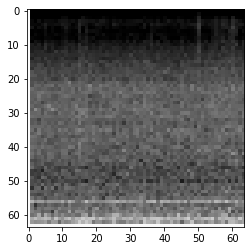

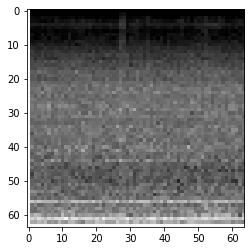

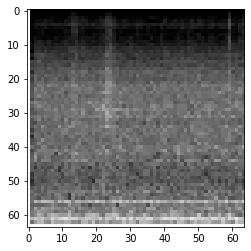

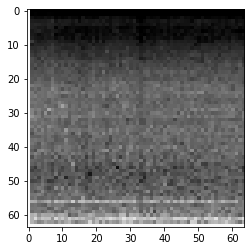

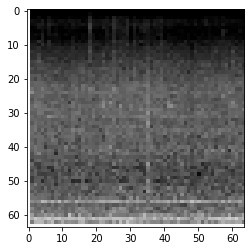

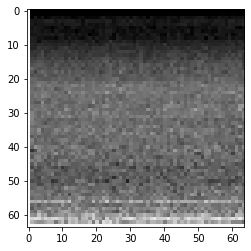

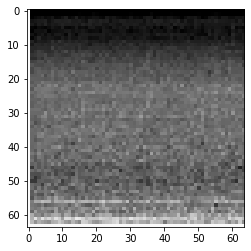

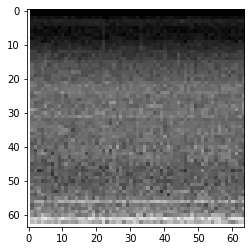

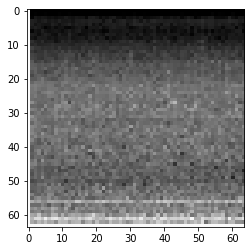

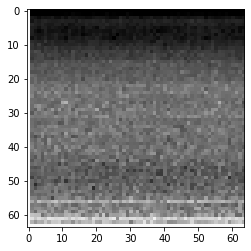

In [5]:
import matplotlib.pyplot as plt
range=0
for image,i in images:
  range+=1
  plt.imshow(image,cmap="gray")
  plt.show()
  if range==10:
    break

In [6]:
X = []
y = []
# Listenin goruntu ve index arraylerine cevrilmesi
for image, idx in images:
  X.append(image)
  y.append(idx)

X = np.array(X)
y = np.array(y)


In [7]:
# Verinin train, test ve validation setlerine bolunmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [8]:
# Olusturulan setlerin kaydedilmesi
folder_name="spectrograms_train_test_val"
os.chdir("/content/drive/MyDrive")
try:
  os.mkdir(folder_name)
except:
  print(f"{folder_name} klasörü mevcut")
  os.chdir(folder_name)
else:
  os.chdir(folder_name)
  


with open("X_train.npy", "wb") as f:
  np.save(f,X_train)


with open("y_train.npy","wb") as f:
  np.save(f,y_train)

with open("X_test.npy","wb") as f:
  np.save(f,X_test)

with open("y_test.npy","wb") as f:
  np.save(f,y_test)

with open("X_val.npy","wb") as f:
  np.save(f,X_val)

with open("y_val.npy","wb") as f:
  np.save(f,y_val)

spectrograms_train_test_val klasörü mevcut
